# Objective

To introduce classification problems and review logistic regression

## Preliminaries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Classification problems

In a classification problem, we are interested in predicting a categorical outcome $y$, given a set of features $\mathbf{X}$. Since the outcome is categorical, in effect, we wish to estimate $\mathbb{P}(y|\mathbf{X})$.

If the outcome has $K$ classes, each class being labelled as one of $\{C_0, C_1, C_2, \ldots, C_{K-1}\}$, we want to estimate the probabilities, $\mathbb{P}(y=C_0|\mathbf{X})$, $\mathbb{P}(y=C_1|\mathbf{X})$, $\ldots$, $\mathbb{P}(y=C_{K-1}|\mathbf{X})$. 

In logistic regression, we work with binary outcomes that is outcomes with two classes - $\{C_0, C_1\}$

$$
\mathbb{P}(y|\mathbf{X}) = \left\{
    \begin{array}\\
        h(\mathbf{X}) & \mbox{for } \ y = C_1 \\
        1 - h(\mathbf{X}) & \mbox{for } \ y = C_0 \\
    \end{array}
\right.
$$

# Probability and Logistic function

An important function that plays a central role in logistic regression is, of course, the logistic function, $h(s)= \dfrac{1}{1+e^{-s}}$.

In [3]:
s = np.linspace(-5, 5, num=100)

In [4]:
h_s = 1/(1 + np.exp(-s))

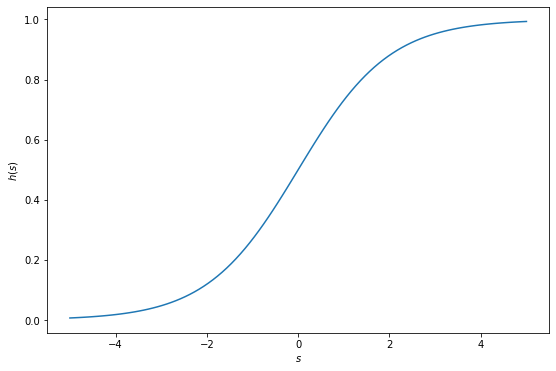

In [6]:
plt.figure(figsize=(9, 6))

plt.plot(s, h_s)
plt.xlabel("$s$")
plt.ylabel("$h(s)$")

plt.show()

Squishing an incoming signal into $h(s)$ forces the output into the region $[0, 1]$. Hence, we have a neat probabilistic interpretation associated with the signal. When the value of the signal, $s$ is high and positive, the value of $h(s)$ moves towards 1.

In logistic regression, we use the same linear combination as in linear regression, but don't stop there. We then squish $s = \sum_{i=0}^pw_ix_i$ into the logistic function, $h(s) = 1/(1+e^{-s})$. 


# Measuring errors

To measure the extent of mistakes we are making on a data set of size $N$ now requires us to keep track of the errors at each of the two classes.

For a single training example $i$, let us define the error as:

$$
E_{\text{training}} = \left\{
    \begin{array}\\
        -ln(h(\mathbf{x}_i)) & \mbox{when } \ y_i = C_1 \\
        -ln(1 - h(\mathbf{x_i})) & \mbox{when } \ y_i = C_0 \\
    \end{array}
\right.
$$


In [8]:
np.log(0.954)

-0.04709160753385057

In [7]:
np.log(0.001)

-6.907755278982137


For each training example, we estimate the error using this formula and take an average across the entire data set for an overall estimate of $E_{\text{training}}$. This average is referred to as cross-entropy.




This approach generalizes to the case when there are more than 2 classes. The only difference is that for $h$, instead of squishing through the logistic function, we use a *softmax* function. This approach of measuring average error using the predicted probability of the class remains the same.

Coming back to logistic regression.

Through some symbol pushing, we can derive $E_{\text{training}}$ for logistic regression to be:

$$
E_{\text{training}} = \dfrac{1}{N}\sum_{i=1}^N \mbox{ln}(1+e^{-y_i\sum_{i=0}^pw_ix_i})
$$

From this formula, we can see that the error $E_{\text{training}}$ is minimized only when the value of $y_i\sum_{i=0}^pw_ix_i$ is large. Intuitively, this means that the class signal and class membership should tally. Otherwise, the error blows up.

Unlike the linear regression case where there was a closed form solution, no such luck favors us in the logistic regression case. A typical way out of this conundrum is to use the gradient descent method by using the gradient as a signal to wiggle the weights in the correct direction. 

Overall, we assume that the training examples are observed independent of each other, and maximize the likelihood of observing the classes, that is, the probability $\mathbb{P}(y|\mathbf{X})$.

# Example: **Diabetes**

## Data

In [9]:
data_file = "/content/drive/MyDrive/AI-ML/supervised-learning-revision/Day1/data/diabetes.csv"

In [10]:
diabetes_df = pd.read_csv(data_file)

## Exploratory

In [11]:
diabetes_df.shape

(768, 9)

In [12]:
diabetes_X, diabetes_y = (diabetes_df.drop('Outcome', axis=1), 
                          diabetes_df.Outcome)

In [13]:
diabetes_Xtrain, diabetes_Xtest, diabetes_ytrain, diabetes_ytest = train_test_split(diabetes_X,
                                                                                    diabetes_y,
                                                                                    test_size=0.2,
                                                                                    random_state=20130810)

In [14]:
diabetes_train = pd.concat([diabetes_Xtrain, diabetes_ytrain],
                           axis=1)

In [15]:
diabetes_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
301,2,144,58,33,135,31.6,0.422,25,1
304,3,150,76,0,0,21.0,0.207,37,0
714,3,102,74,0,0,29.5,0.121,32,0
71,5,139,64,35,140,28.6,0.411,26,0
28,13,145,82,19,110,22.2,0.245,57,0


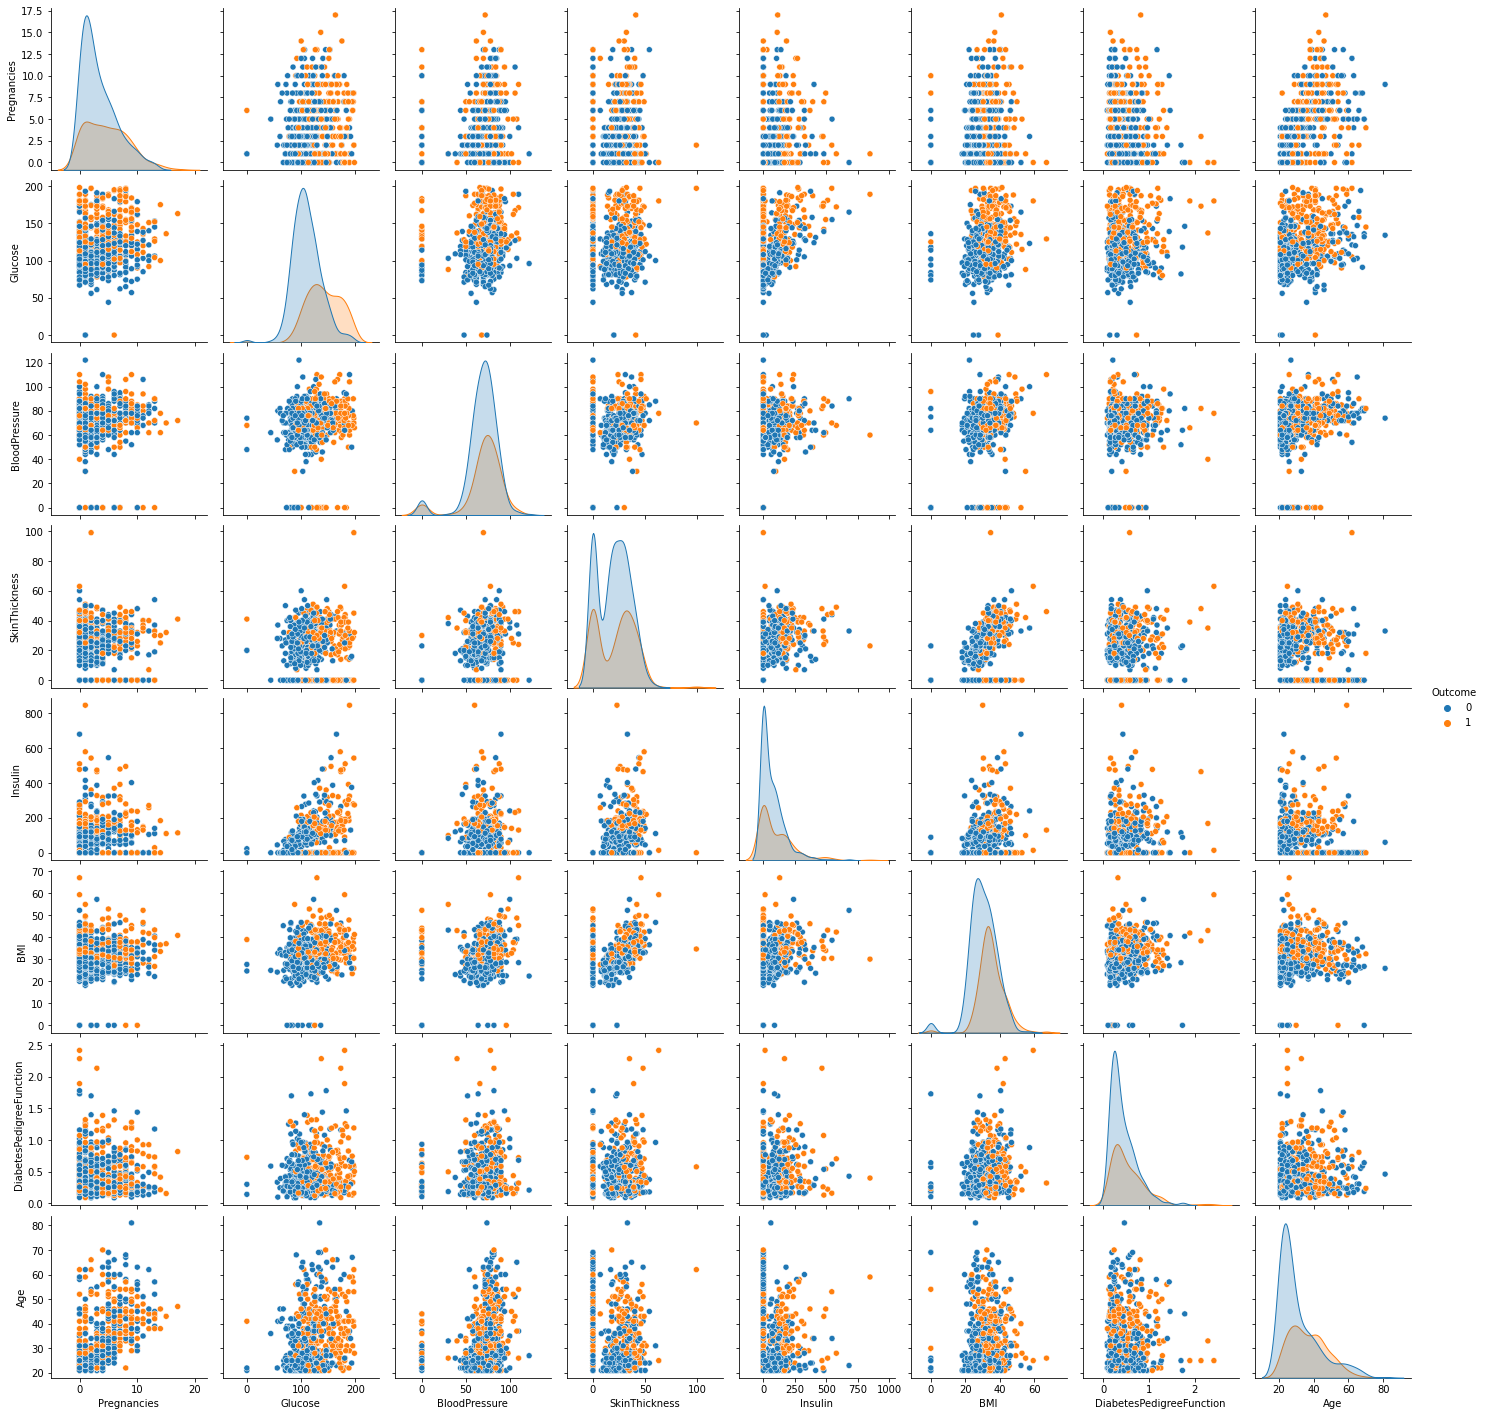

In [16]:
sns.pairplot(diabetes_train, 
             hue='Outcome',
             diag_kind='kde')

## Model1


No standardization

In [17]:
diabetes_X, diabetes_y = (diabetes_df.drop('Outcome', axis=1), 
                          diabetes_df.Outcome)

In [ ]:
diabetes_Xtrain, diabetes_Xtest, diabetes_ytrain, diabetes_ytest = train_test_split(diabetes_X,
                                                                                    diabetes_y,
                                                                                    test_size=0.2,
                                                                                    random_state=20130810)

In [18]:
learner_logistic = LogisticRegression(solver='liblinear')

In [19]:
learner_logistic.fit(diabetes_Xtrain, diabetes_ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

$E_{\text{training}}$ is minimized when in-sample accuracy is maximized. The accuracy is more interesting in the case of classifiers since the numeric value of the error function is not intuitive.

In [20]:
learner_logistic.score(diabetes_Xtrain, diabetes_ytrain)

0.7638436482084691

## Model 2

Standardizing numeric features

In [23]:
diabetes_X, diabetes_y = (diabetes_df.drop('Outcome', axis=1), 
                          diabetes_df.Outcome)

In [24]:
diabetes_Xtrain, diabetes_Xtest, diabetes_ytrain, diabetes_ytest = train_test_split(diabetes_X,
                                                                                    diabetes_y,
                                                                                    test_size=0.2,
                                                                                    random_state=20130810)

In [25]:
sc = StandardScaler()

In [26]:
diabetes_scaledXtrain = sc.fit_transform(diabetes_Xtrain)
diabetes_scaledXtest = sc.transform(diabetes_Xtest)

In [27]:
learner_logistic = LogisticRegression()

In [28]:
learner_logistic.fit(diabetes_scaledXtrain, diabetes_ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
learner_logistic.score(diabetes_scaledXtrain, diabetes_ytrain)

0.7703583061889251

Standardization helps to stabilize gradients

## Model 3

Polynomial features

In [30]:
diabetes_X, diabetes_y = (diabetes_df.drop('Outcome', axis=1), 
                          diabetes_df.Outcome)

In [31]:
diabetes_Xtrain, diabetes_Xtest, diabetes_ytrain, diabetes_ytest = train_test_split(diabetes_X,
                                                                                    diabetes_y,
                                                                                    test_size=0.2,
                                                                                    random_state=20130810)

In [32]:
pf = PolynomialFeatures(degree=2)

In [33]:
diabetes_pfXtrain = pf.fit_transform(diabetes_Xtrain)
diabetes_pfXtest = pf.transform(diabetes_Xtest)

In [34]:
sc = StandardScaler()

In [35]:
diabetes_scaledXtrain = sc.fit_transform(diabetes_pfXtrain)
diabetes_scaledXtest = sc.transform(diabetes_pfXtest)

In [36]:
diabetes_Xtrain.shape, diabetes_scaledXtrain.shape

((614, 8), (614, 45))

In [37]:
learner_logistic = LogisticRegression()

In [38]:
learner_logistic.fit(diabetes_scaledXtrain, diabetes_ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
learner_logistic.score(diabetes_scaledXtrain, diabetes_ytrain)

0.7980456026058632

Task: Do a validation split and figure out the best polynomial transformation

# Summary

- Logistic Regression presents a way to extend linear models for binary classification

- By using a logistic squisher, logistic regression works with the probabilities of observing one of the classes of the target